# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования - установить параметры, влияющие на рыночную стоимость объектов недвижимости.**

Исходные данные - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

Вопросы, интересующие заказчика:

1. Сколько времени занимает продажа квартиры. 

2. Какие факторы больше всего влияют на стоимость квартиры.

3. Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений.

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data =pd.read_csv(r'~/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.shape

(23699, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


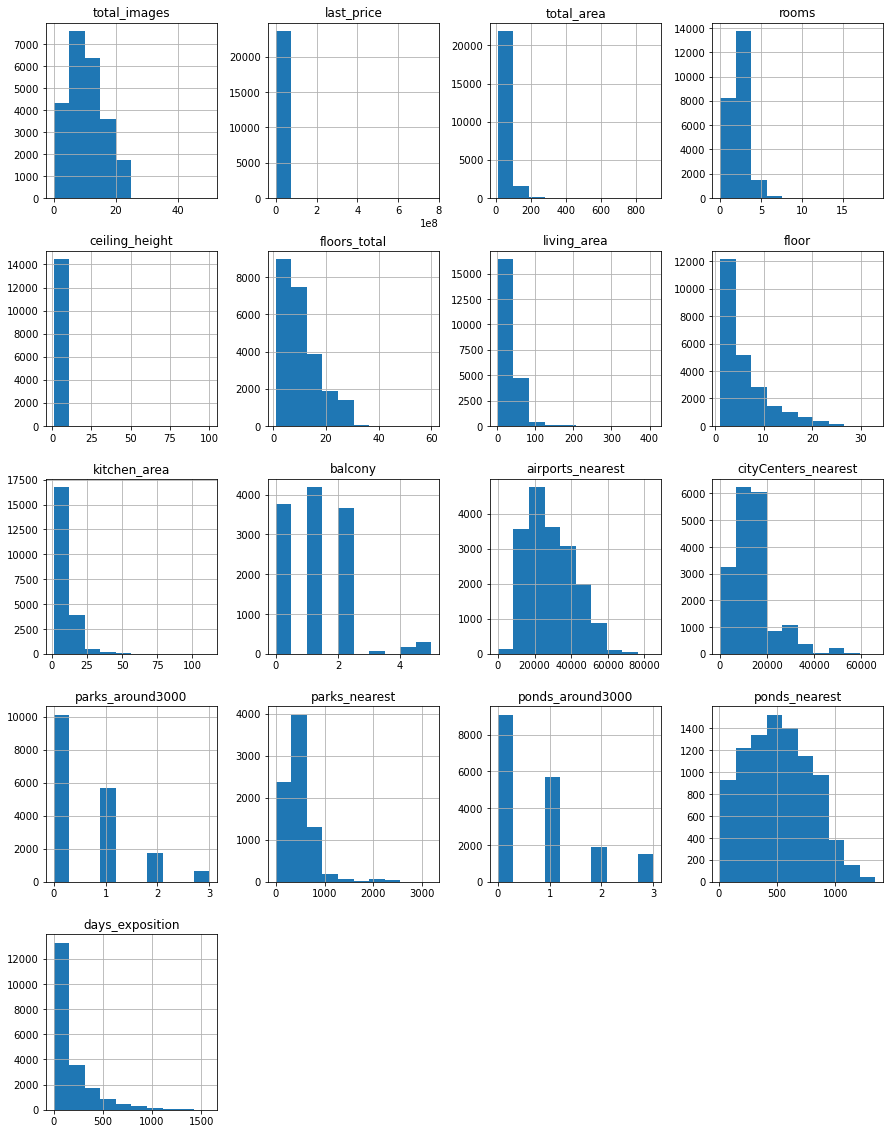

In [10]:
data.hist(figsize=(15, 20));

Всего у нас 23699 записи. Нужно заполнить пропуски и привести к корректному типу данных.

### Предобработка данных

In [11]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
# Удаляем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Приводим этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)

# Группировка данных по городу и количеству этажей и заполнение пропущенных значений медианным значением в каждой группе
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].transform(lambda x: x.fillna(x.median(skipna=False)))

# Если остаются пропущенные значения после группировки, заполняем их медианным значением по всему столбцу
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# Проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Столбцы cityCenters_nearest, parks_nearest, ponds_nearest трогать не будем, непонятно, какими оптимальными значаниями их заполнять.

In [13]:
# Замечены неявные дубликаты, устраним их... приведём значения к нижнему регистру для избавления от дубликатов
data['locality_name'] = data['locality_name'].str.lower()

# Выполним замену ошибки в написании 'поселок' вместо 'посёлок':
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

# Замена однотипный значений
data['locality_name'] = data.locality_name.str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data.locality_name.str.replace('городской поселок', 'поселок')

# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

# В данной колонке 49 пропущенных значений, считаю верным решением их удалить т.к. у нас нет необходимой
# информации для его заполнения, такой как координаты или подобной информации...

# Kол-во уникальных значений после удаления дубликатов
print('Количество населенных пунктов:', data.locality_name.nunique())

Количество населенных пунктов: 330


**Рассчёты и добавление результатов в таблицу**

In [14]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Добавляем столбец расстояния до центра города в километрах.
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['centers_km'] = data['cityCenters_nearest'] / 1000
data['centers_km'] = data['centers_km'].astype(int)

# Устанавливаем маркер 9999 для пропусков в сроке продажи и приводим к целочисленному типу
data['days_exposition'].fillna(9999, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)

### Исследовательский анализ данных

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Список параметров:

1. общая площадь;
2. жилая площадь;
3. площадь кухни;
4. цена объекта;
5. количество комнат;
6. высота потолков;
7. тип этажа квартиры («первый», «последний», «другой»);
8. бщее количество этажей в доме;
9. расстояние до центра города в метрах;
10. расстояние до ближайшего парка

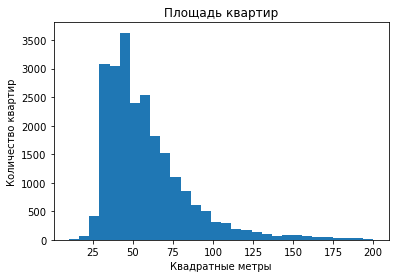

Наибольшие по площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64


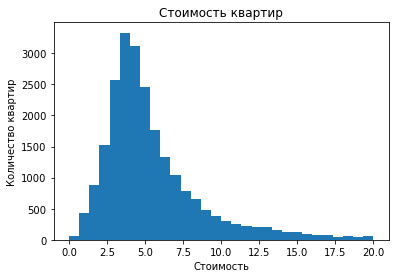

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int32


In [16]:
# Работаем с площадью
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

# Работаем со стоимостью
plt.hist(data['last_price']/1000000, bins=30, range=(0,20))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

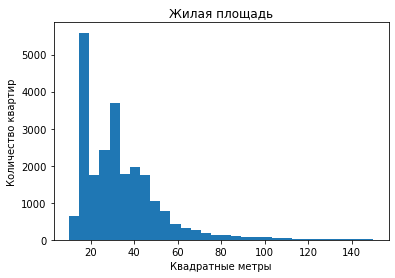

Наибольшие по площади варианты:
19540    409.700000
5358     409.000000
3117     360.410721
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.586942
Name: living_area, dtype: float64


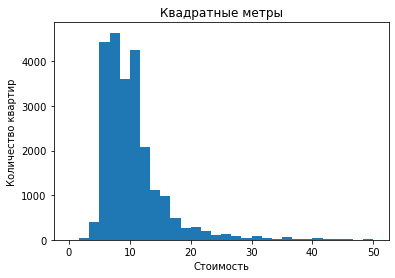

Наибольшие по площади варианты:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.537299
10867     87.200000
9826      86.504359
492       77.000000
Name: kitchen_area, dtype: float64


In [17]:
# Работаем с жилой площадью
plt.hist(data['living_area'], bins=30, range=(10,150))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

# Работаем с площадью кухни
plt.hist(data['kitchen_area'], bins=30, range=(0, 50))
plt.title('Квадратные метры')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

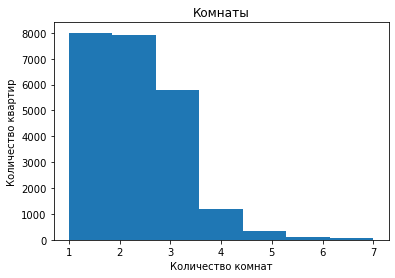

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


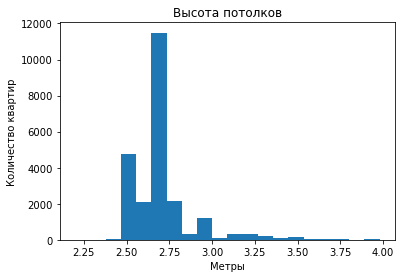

Наибольшие по высоте потолков варианты:
22869    100.0
3148      32.0
22336     32.0
21377     27.5
5807      27.0
5246      27.0
10773     27.0
17857     27.0
21824     27.0
20478     27.0
Name: ceiling_height, dtype: float64


In [18]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))

# Работаем с потолками
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

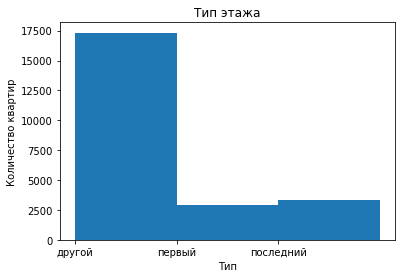

Наибольшие по количеству:
6813     последний
17303    последний
3054     последний
8675     последний
17284    последний
3060     последний
3063     последний
8669     последний
3067     последний
17290    последний
Name: floor_type, dtype: object


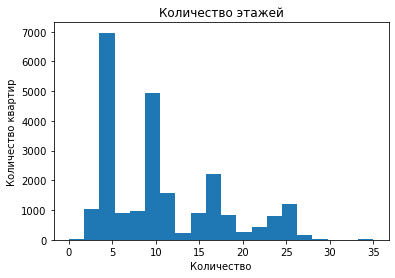

Наибольшие по количеству этажей:
2253     60
16731    52
16934    37
5807     36
11079    36
397      36
13975    35
2966     35
9186     35
1917     35
Name: floors_total, dtype: int32


In [19]:
# Работаем с типом этажей
plt.hist(data['floor_type'], bins=3, range=(0,3))
plt.title('Тип этажа')
plt.xlabel('Тип')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству:')
print(data['floor_type'].sort_values(ascending=False).head(10))

# Работаем с количеством этажей
plt.hist(data['floors_total'], bins=20, range=(0, 35))
plt.title('Количество этажей')
plt.xlabel('Количество')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству этажей:')
print(data['floors_total'].sort_values(ascending=False).head(10))

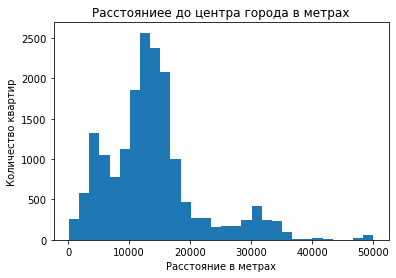

Наибольшие по расстоянию до центра города в метрах:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64


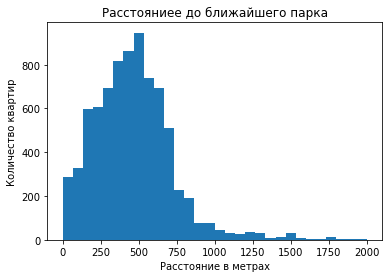

Наибольшие по расстоянию до ближайшего парка:
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64


In [20]:
# Работаем с расстоянием до центра города в метрах
plt.hist(data['cityCenters_nearest'], bins=30, range=(100,50000))
plt.title('Расстояниее до центра города в метрах')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до центра города в метрах:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

# Работаем  с расстоянием до ближайшего парка
plt.hist(data['parks_nearest'], bins=30, range=(0, 2000))
plt.title('Расстояниее до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до ближайшего парка:')
print(data['parks_nearest'].sort_values(ascending=False).head(10))

##### Вывод: 
1. Площадь

Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.

2. Стоимость

В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.

3. Жилая площадь

Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи.

4. Площадь кухни

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

5. Комнаты

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно.

6. Высота потолков

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.

7. Тип этажа

Самый популярный - другой. Наименьшей популярностью пользуется первый этаж.

8. Количество этажей в доме

В основном встречаются значения в диапазоне от 3 до 25 этажа.

9. Расстояние до центра города в метрах

В основном это расстояние равно 20 км. Но есть небольшой скачок в 30 км.

10. Расстояние до ближайшего парка

Большинство квартир находятся в 1 км до парка.

#### Изучение времени продажи квартиры

Время продажи (медиана): 95
Время продажи (среднее): 181


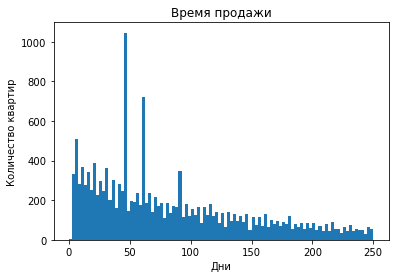

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [21]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()))
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()))
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

##### Вывод
Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

In [23]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,centers_km
count,23565.000000,2.151900e+04,22326.000000,23565.000000,20601.000000,23565.000000,22682.000000,23565.000000,22250.000000,23565.000000,18041.000000,23565.000000,23565.000000,8030.000000,23565.000000,9036.000000,19996.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115e+06,54.319704,2.013495,2.631089,10.675875,31.526984,5.878124,9.417840,0.593677,28797.082701,10879.530617,0.468831,490.580448,0.589900,518.289509,162.414783,9.940539e+04,2.567367,6.401570,2017.371016,10.498960
std,5.681156,2.215774e+06,19.331030,0.986750,0.081473,6.594823,13.752739,4.871485,3.177523,0.960660,12632.499735,9639.346166,0.748403,341.572956,0.883966,278.009558,177.715098,5.038944e+04,1.788279,3.492948,1.037393,9.512143
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18565.000000,2186.000000,0.000000,288.000000,0.000000,293.000000,44.000000,7.656600e+04,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,11246.000000,0.000000,455.000000,0.000000,503.000000,92.000000,9.500000e+04,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.650000,16.000000,40.600000,8.000000,11.000000,1.000000,37273.000000,15237.000000,1.000000,612.000000,1.000000,730.000000,217.000000,1.142130e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,1.186686e+07,114.200000,5.000000,2.850000,60.000000,76.700000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,907.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.000000


В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше.

### Определение факторов, влияющих на стоимость квартиры

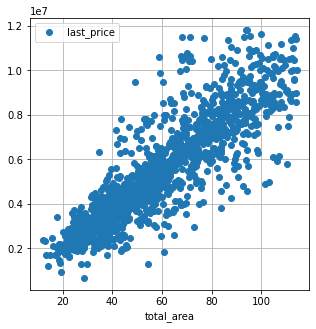

Корреляция цены и площади:
            last_price  total_area
last_price    1.000000    0.905372
total_area    0.905372    1.000000


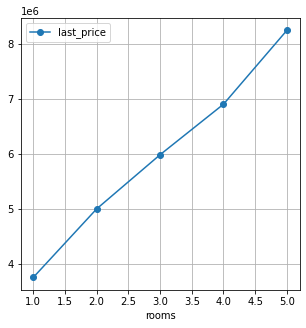

Корреляция цены и числа комнат:
            last_price     rooms
last_price    1.000000  0.537551
rooms         0.537551  1.000000


In [25]:
# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr())

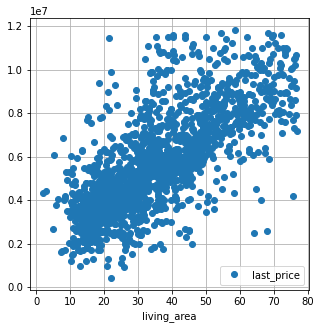

Корреляция цены и жилой площади:
             last_price  living_area
last_price     1.000000     0.729359
living_area    0.729359     1.000000


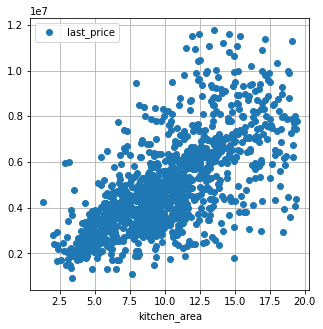

Корреляция цены и жилой площади:
              kitchen_area  last_price
kitchen_area      1.000000    0.445313
last_price        0.445313    1.000000


In [26]:
# Зависимость цены от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

# Зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

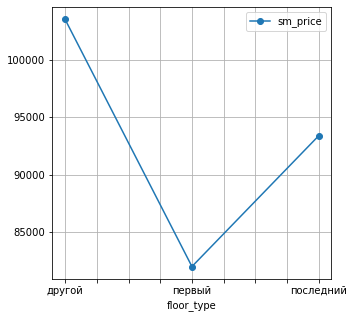

Корреляция цены и типа этажа:
            sm_price  total_area
sm_price    1.000000    0.047401
total_area  0.047401    1.000000


In [27]:
# Зависимость цены и типом этажа
(
    data.pivot_table(index='floor_type', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и типа этажа:')
print(data.pivot_table(index='floor', values=['total_area', 'sm_price']).corr())

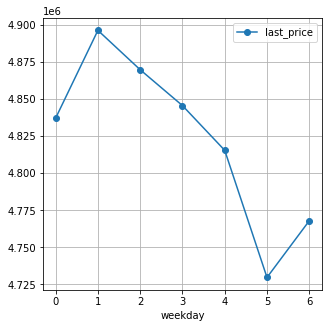

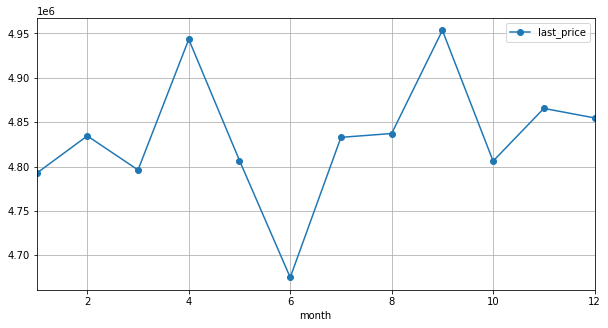

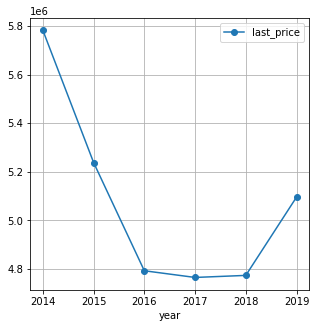

In [28]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

#### Вывод
1. Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади.


2. Высокая корреляция с жилой площадью, с площадью кухни не так сильно выражена.


3. Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.


4. Зависимость от дня, месяца и года.

День недели: дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу.

Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.

Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [29]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
санкт-петербург,114868
пушкин,103125
деревня кудрово,92473
посёлок парголово,90175
посёлок мурино,85629
посёлок шушары,78550
колпино,75424
гатчина,68745
всеволожск,68654


<AxesSubplot:xlabel='locality_name'>

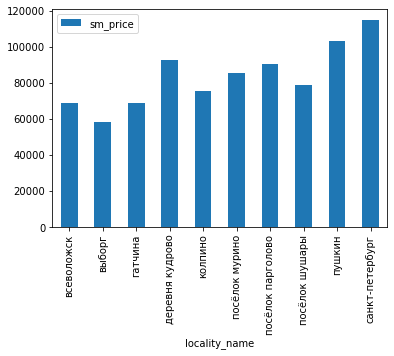

In [30]:
city_sm_price.plot(kind='bar')

###### Вывод
Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, далее районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске.

### Квартиры в Санкт-Петербурге и их средняя стоимость на разном удалении от центра

              last_price
centers_km              
0           7.570031e+06
1           8.105378e+06
2           7.632265e+06
3           7.434427e+06
4           7.740357e+06
5           7.374783e+06
6           6.792969e+06
7           6.697635e+06
8           6.237521e+06
9           5.317939e+06
10          5.344931e+06
11          5.305477e+06
12          5.349259e+06
13          5.527066e+06
14          5.276288e+06
15          5.146181e+06
16          5.055173e+06
17          4.668428e+06
18          4.786486e+06
19          4.583555e+06
20          6.365864e+06
21          5.040227e+06
22          5.095368e+06
23          4.126867e+06
24          3.862235e+06
25          4.048664e+06
26          3.575000e+06
27          2.250000e+06
28          4.910500e+06
29          3.833333e+06


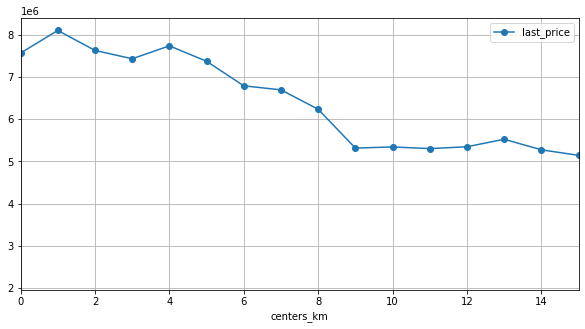

In [31]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
piter =  data.query('locality_name == "санкт-петербург"').pivot_table(index='centers_km', values='last_price')
piter.plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
print(piter)
plt.show()

##### Вывод
По мере удаления от центра стоимость квартир постепенно снижается. После 7 км стоимость снижается.

### Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. 
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

### Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

Дороже всего квадратный метр в Санкт-Петербурге - 114868

Дешевле всего квадратный метр в Выборге - 58141

### Факторы, влияющие на стоимость в центре Санкт-Петербурга

В центре города практически нет разницы, насколько квартира удалена от условного центра города.
Дальше 7 км стоимость начинает падать.